>>p10
1. Create a form using the following widgets for your domain.
Label, Entry, Button, RadioButton, OptionMenu, Checkbutton, message box
2. Apply regular expression to validate the input of all widgets. Reuse your code from
P6: Implement ‘re’ module
3. Make a simple calculation related to your domain. E.g. Age from DOB, Amount to be
paid, Year of experience from date of joining, etc.
4. Display all widget inputs that are received from the user.

In [17]:
import tkinter as tk
import re
import datetime
from tkinter import messagebox

# Validation functions
def verify_name(name):
    pattern = r'^[A-Za-z. ]+$'
    return re.match(pattern, name)

def verify_digit(regno):
    pattern = r'^\d+$'
    return re.match(pattern, regno)

def verify_cgpa(cgpa):
    pattern = r'^[0-9](\.\d+)?$|^10(\.0+)?$'
    return re.match(pattern, cgpa)

def verify_dob(date_of_birth):
    pattern = r'^\d{4}-\d{2}-\d{2}$'
    return re.match(pattern, date_of_birth)

def verify_course(course):
    valid_courses = ['MCA', 'BCA', 'MSC']
    return course in valid_courses

def calculate_age(dob):
    
    today = datetime.date.today()
    dob = datetime.datetime.strptime(dob, "%Y-%m-%d").date()
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age


def calculate_and_display():
    
    title = ""
    if title_mr_var.get():
        title = "Mr."
    elif title_ms_var.get():
        title = "Ms."
    elif title_mrs_var.get():
        title = "Mrs."

    name = entry_name.get()
    regno = entry_regno.get()
    cgpa = entry_cgpa.get()
    dob = entry_dob.get()
    course = option_var.get()
    gender = gender_var.get()
    joining_date = entry_joining_date.get()
    amount_to_pay = entry_amount_to_pay.get()

    
    if (
        verify_name(name) and
        verify_digit(regno) and
        verify_cgpa(cgpa) and
        verify_dob(dob) and
        verify_course(course)
    ):
        
        age = calculate_age(dob)

        
        message_text.set(
            f"Title: {title}\n"
            f"Name: {name}\n"
            f"Registration No: {regno}\n"
            f"CGPA: {cgpa}\n"
            f"Date of Birth: {dob}\n"
            f"Age: {age}\n"
            f"Course: {course}\n"
            f"Gender: {gender}\n"
            f"Date of Joining: {joining_date}\n"
            f"Amount to Pay: ${amount_to_pay}"
        )
    else:
        messagebox.showerror("Validation Error", "One or more entries are invalid")


root = tk.Tk()
root.title("Domain Form")


root.geometry("450x800")


label_title = tk.Label(root, text="Title:")
label_title.grid(row=0, column=0, padx=10, pady=10)
title_mr_var = tk.BooleanVar()
title_mr_checkbox = tk.Checkbutton(root, text="Mr.", variable=title_mr_var)
title_mr_checkbox.grid(row=0, column=1, padx=10, pady=10, sticky="w")
title_ms_var = tk.BooleanVar()
title_ms_checkbox = tk.Checkbutton(root, text="Ms.", variable=title_ms_var)
title_ms_checkbox.grid(row=0, column=1, padx=10, pady=10, sticky="e")
title_mrs_var = tk.BooleanVar()
title_mrs_checkbox = tk.Checkbutton(root, text="Mrs.", variable=title_mrs_var)
title_mrs_checkbox.grid(row=0, column=2, padx=10, pady=10, sticky="w")


label_name = tk.Label(root, text="Name:")
label_name.grid(row=1, column=0, padx=10, pady=10)
entry_name = tk.Entry(root)
entry_name.grid(row=1, column=1, padx=10, pady=10)


label_regno = tk.Label(root, text="Registration No:")
label_regno.grid(row=2, column=0, padx=10, pady=10)
entry_regno = tk.Entry(root)
entry_regno.grid(row=2, column=1, padx=10, pady=10)


label_cgpa = tk.Label(root, text="CGPA:")
label_cgpa.grid(row=3, column=0, padx=10, pady=10)
entry_cgpa = tk.Entry(root)
entry_cgpa.grid(row=3, column=1, padx=10, pady=10)


label_dob = tk.Label(root, text="Date of Birth (YYYY-MM-DD):")
label_dob.grid(row=4, column=0, padx=10, pady=10)
entry_dob = tk.Entry(root)
entry_dob.grid(row=4, column=1, padx=10, pady=10)


label_course = tk.Label(root, text="Course:")
label_course.grid(row=5, column=0, padx=10, pady=10)
course_options = ['MCA', 'BCA', 'MSC']
option_var = tk.StringVar()
option_menu = tk.OptionMenu(root, option_var, *course_options)
option_menu.grid(row=5, column=1, padx=10, pady=10)
option_var.set(course_options[0])


label_gender = tk.Label(root, text="Gender:")
label_gender.grid(row=6, column=0, padx=10, pady=10)
gender_var = tk.StringVar()
radio_button_male = tk.Radiobutton(root, text="Male", variable=gender_var, value="Male")
radio_button_female = tk.Radiobutton(root, text="Female", variable=gender_var, value="Female")
radio_button_male.grid(row=6, column=1, padx=10, pady=10, sticky="w")
radio_button_female.grid(row=6, column=1, padx=10, pady=10, sticky="e")


label_joining_date = tk.Label(root, text="Date of Joining (YYYY-MM-DD):")
label_joining_date.grid(row=7, column=0, padx=10, pady=10)
entry_joining_date = tk.Entry(root)
entry_joining_date.grid(row=7, column=1, padx=10, pady=10)


label_amount_to_pay = tk.Label(root, text="Amount to be Paid:")
label_amount_to_pay.grid(row=8, column=0, padx=10, pady=10)
entry_amount_to_pay = tk.Entry(root)
entry_amount_to_pay.grid(row=8, column=1, padx=10, pady=10)

calculate_button = tk.Button(root, text="Calculate and Display", command=calculate_and_display)
calculate_button.grid(row=9, column=0, columnspan=2, padx=10, pady=10)


message_text = tk.StringVar()
message_box = tk.Message(root, textvariable=message_text)
message_box.grid(row=10, column=0, columnspan=2, padx=10, pady=10)

root.mainloop()


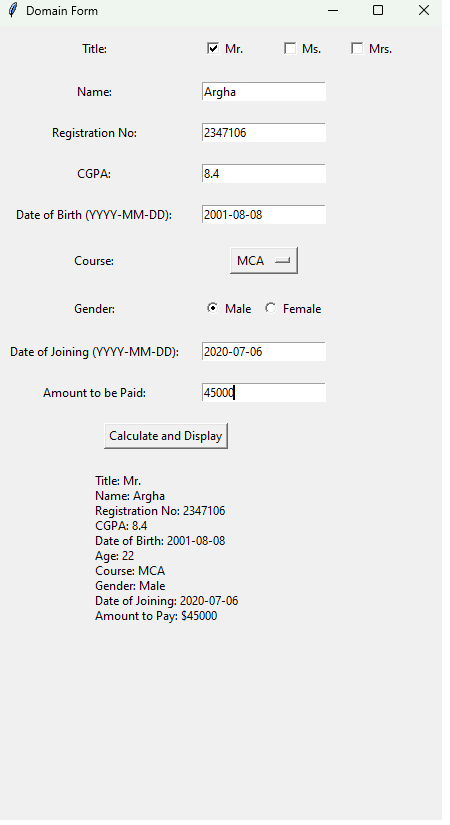